In [1]:
# %pip install python-dotenv
# %pip install seaborn
# %pip install tensorflow_data_validation
#  %pip install git+https://github.com/tensorflow/docs



In [2]:
import os
import pandas as pd
import geopandas as gpd
import pygeos as pg
import numpy as np
# import tensorflow as tf
# import tensorflow_data_validation as tfdv
import sklearn as sk
import scipy as sp
import seaborn as sns
# from datetime import datetime
# from dotenv import load_dotenv
from IPython.display import clear_output
from matplotlib import pyplot as plt
from shapely import wkt


f:\Programs\Miniconda3\envs\ml\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\Red\AppData\Local\Temp\ipykernel_659604\2532399237.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.i

In [3]:
# The following lines adjust the granularity of reporting.
#pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [4]:
def getGPDfromPD(df: pd.DataFrame, geomCol: str, crs: str = "EPSG:3978") -> gpd.GeoDataFrame:
    """
    Convert a pandas dataframe to a geopandas dataframe
    :param df: pandas dataframe
    :param geomCol: name of the geometry column
    :param crs: coordinate reference system
    :return: geopandas dataframe
    """
    if 'geom' in df.columns:
        df.rename(columns={'geom': 'geometry'}, inplace=True)

    df[geomCol] = df[geomCol].apply(wkt.loads)
    gdf = gpd.GeoDataFrame(df, geometry=geomCol, crs=crs)
    return gdf


In [5]:
fireWeatherTable = "FinalFeatureV2.csv"
dfFireWeather = pd.read_csv(fireWeatherTable)


In [6]:
dfEval = dfFireWeather.copy(deep=True)
dfEval.describe()

,ENTRYID,YEAR,MONTH,DAY,SIZE_HA,SIZE_HA_BIN,ELEVATIONM,DIST_TO_WATER,DAYW,MAXTEMP,MEANHUMIDITY,MEANWINDSPEED,MAXWINDSPEED,TOTALPRECIP,LONG,LAT,LONGBIN,LATBIN,utc,7daySumMaxTemp,7daySumHumidity,7daySumWindSpeed,14daySumMaxTemp,14daySumHumidity,14daySumWindSpeed
count,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0
mean,1143.2,2009.5,6.4,16.7,10705.3,1.7,742.7,3881.6,15.7,23.1,61.2,8.3,16.2,0.2,5375901.9,2375607.2,365.0,384.7,1261799138755980800.0,11.8,31.6,3.8,11.8,31.6,3.8
std,1439.2,5.3,1.1,9.0,29415.9,1.1,513.4,4094.2,9.0,6.4,12.1,3.4,5.9,1.5,139093.0,204885.0,111.1,97.6,167734934973968416.0,12.5,32.4,4.3,12.5,32.4,4.3
min,283.0,2000.0,1.0,2.0,201.8,0.0,225.0,0.0,1.0,-6.2,28.0,2.1,4.0,0.0,4918132.3,1567321.0,0.0,0.0,956880000000000000.0,-9.1,0.0,0.0,-9.1,0.0,0.0
25%,522.8,2005.0,6.0,8.0,704.4,1.0,434.0,1114.6,7.0,21.1,53.0,5.9,11.0,0.0,5267895.2,2246671.4,278.5,323.0,1120867200000000000.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,753.5,2010.0,6.0,17.0,2070.2,2.0,496.0,2467.7,16.0,24.4,61.0,7.5,16.0,0.0,5379082.5,2392909.7,367.5,393.0,1276905600000000000.0,0.0,38.0,2.1,0.0,38.0,2.1
75%,1539.2,2015.0,7.0,25.0,7250.0,3.0,1161.0,5318.9,24.0,26.9,68.6,10.2,20.0,0.0,5493470.9,2524069.0,459.0,455.0,1431734400000000000.0,24.6,62.4,7.0,24.6,62.4,7.0
max,10650.0,2020.0,10.0,31.0,476376.8,3.0,3668.0,29418.8,30.0,34.9,96.9,30.1,37.0,20.8,5632110.7,2763468.2,569.0,569.0,1593388800000000000.0,34.5,93.7,19.3,34.5,93.7,19.3


In [7]:
# log transform SIZE_HA
dfEval['SIZE_HA'] = np.log(dfEval['SIZE_HA'])

# binning SIZE_HA into 4 categories L M H E in SIZE_HA_BIN
dfEval['SIZE_HA_BIN'] = pd.qcut(dfEval['SIZE_HA'], 4, labels=['L', 'M', 'H', 'E'])

# count the number of fires in each SIZE_HA_BIN
dfEval['SIZE_HA_BIN'].value_counts()

L    209
M    209
H    209
E    209
Name: SIZE_HA_BIN, dtype: int64

In [8]:
# print rows with nan
print(dfEval.describe())

       ENTRYID   YEAR  MONTH   DAY  SIZE_HA  ELEVATIONM  DIST_TO_WATER  DAYW  \
count    836.0  836.0  836.0 836.0    836.0       836.0          836.0 836.0   
mean    1143.2 2009.5    6.4  16.7      7.8       742.7         3881.6  15.7   
std     1439.2    5.3    1.1   9.0      1.6       513.4         4094.2   9.0   
min      283.0 2000.0    1.0   2.0      5.3       225.0            0.0   1.0   
25%      522.8 2005.0    6.0   8.0      6.6       434.0         1114.6   7.0   
50%      753.5 2010.0    6.0  17.0      7.6       496.0         2467.7  16.0   
75%     1539.2 2015.0    7.0  25.0      8.9      1161.0         5318.9  24.0   
max    10650.0 2020.0   10.0  31.0     13.1      3668.0        29418.8  30.0   

       MAXTEMP  MEANHUMIDITY  MEANWINDSPEED  MAXWINDSPEED  TOTALPRECIP  \
count    836.0         836.0          836.0         836.0        836.0   
mean      23.1          61.2            8.3          16.2          0.2   
std        6.4          12.1            3.4           5.9

In [9]:
# Store our random selection, run once
# randomTrain = "RandomTrain"
# dfTrain.to_sql(randomTrain, db_push_con, if_exists='replace', index=False)

# randomTest = "RandomTest"
# dfTest.to_sql(randomTest, db_push_con, if_exists='replace', index=False)

# randomValidate = "RandomValidate"
# dfValidate.to_sql(randomValidate, db_push_con, if_exists='replace', index=False)


In [10]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score


In [11]:
dfEval.columns


Index(['ENTRYID', 'FIRE_ID', 'FIRENAME', 'YEAR', 'MONTH', 'DAY', 'REP_DATE',
       'SIZE_HA', 'SIZE_HA_BIN', 'GEOM', 'ELEVATIONM', 'DIST_TO_WATER',
       'CLIMATEID', 'PROVINCECODE', 'DAYW', 'MAXTEMP', 'MEANHUMIDITY',
       'MEANWINDSPEED', 'MAXWINDSPEED', 'TOTALPRECIP', 'RAIN', 'LONG', 'LAT',
       'LONGBIN', 'LATBIN', 'utc', '7daySumMaxTemp', '7daySumHumidity',
       '7daySumWindSpeed', '7dayRain', '14daySumMaxTemp', '14daySumHumidity',
       '14daySumWindSpeed', '14dayRain'],
      dtype='object')

In [12]:
# sum of size_ha column
dfEval['SIZE_HA'].sum()

6551.109478673032

In [13]:
dfTrim = dfEval.copy(deep=True)

# edit this
dfTrim = dfTrim.drop(columns={'ENTRYID', 'FIRE_ID', 'FIRENAME', 'GEOM', 'CLIMATEID', 'PROVINCECODE',
                              'TOTALPRECIP', 'LONG', 'LAT', 'REP_DATE', 'SIZE_HA', 'utc'})


In [14]:
dfTrim.columns

Index(['YEAR', 'MONTH', 'DAY', 'SIZE_HA_BIN', 'ELEVATIONM', 'DIST_TO_WATER',
       'DAYW', 'MAXTEMP', 'MEANHUMIDITY', 'MEANWINDSPEED', 'MAXWINDSPEED',
       'RAIN', 'LONGBIN', 'LATBIN', '7daySumMaxTemp', '7daySumHumidity',
       '7daySumWindSpeed', '7dayRain', '14daySumMaxTemp', '14daySumHumidity',
       '14daySumWindSpeed', '14dayRain'],
      dtype='object')

In [15]:
#show rows 50-55
#dfTrim[50:55]
#count rows with 0 7daysummaxtemp
#dfTrim[dfTrim['7daySumMaxTemp'] == 0].count()
dfTrim.count()


YEAR                 836
MONTH                836
DAY                  836
SIZE_HA_BIN          836
ELEVATIONM           836
DIST_TO_WATER        836
DAYW                 836
MAXTEMP              836
MEANHUMIDITY         836
MEANWINDSPEED        836
MAXWINDSPEED         836
RAIN                 836
LONGBIN              836
LATBIN               836
7daySumMaxTemp       836
7daySumHumidity      836
7daySumWindSpeed     836
7dayRain             836
14daySumMaxTemp      836
14daySumHumidity     836
14daySumWindSpeed    836
14dayRain            836
dtype: int64

In [16]:
# replace size_ha_bin 0 1 2 3 with L M H E

# dfTrim['SIZE_HA_BIN'] = dfTrim['SIZE_HA_BIN'].astype(str).replace('0', 'L')
# dfTrim['SIZE_HA_BIN'] = dfTrim['SIZE_HA_BIN'].astype(str).replace('1', 'M')
# dfTrim['SIZE_HA_BIN'] = dfTrim['SIZE_HA_BIN'].astype(str).replace('2', 'H')
# dfTrim['SIZE_HA_BIN'] = dfTrim['SIZE_HA_BIN'].astype(str).replace('3', 'E')


In [17]:
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
         2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
trainYears = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
testYears = [2017, 2018, 2019, 2020, 2021, 2022]
dfTrain = dfTrim[dfTrim['YEAR'].isin(trainYears)].drop(columns={'SIZE_HA_BIN'})
dfTest = dfTrim[dfTrim['YEAR'].isin(testYears)].drop(columns={'SIZE_HA_BIN'})


In [18]:
def scaleData(df: pd.DataFrame) -> pd.DataFrame:
    mean = df.mean()
    std = df.std()
    # regularize y values using z score
    df = (df - mean) / std
    # set max value to 3 zscore
    df[df > 3] = 3
    # set min value to -3 zscore
    df[df < -3] = -3

    # shift the wole train set to be positive
    # df = df + 3

    # return dataframe list of means and stds
    return df, mean, std


In [19]:
dfTemp = dfTrain.copy(deep=True)
dfTrainScaled, dfMeans, dfStdevs = scaleData(dfTemp)
dfTrainScaled['YEAR'] = dfTrain['YEAR']
dfTrainScaled['SIZE_HA_BIN'] = dfTrim[dfTrim['YEAR'].isin(trainYears)]['SIZE_HA_BIN']



In [20]:

print(dfTrainScaled.count())
print(dfTrainScaled.isna().sum().sum())
print(dfTrainScaled.dtypes)


YEAR                 754
MONTH                754
DAY                  754
ELEVATIONM           754
DIST_TO_WATER        754
DAYW                 754
MAXTEMP              754
MEANHUMIDITY         754
MEANWINDSPEED        754
MAXWINDSPEED         754
RAIN                 754
LONGBIN              754
LATBIN               754
7daySumMaxTemp       754
7daySumHumidity      754
7daySumWindSpeed     754
7dayRain             754
14daySumMaxTemp      754
14daySumHumidity     754
14daySumWindSpeed    754
14dayRain            754
SIZE_HA_BIN          754
dtype: int64
0
YEAR                    int64
MONTH                 float64
DAY                   float64
ELEVATIONM            float64
DIST_TO_WATER         float64
DAYW                  float64
MAXTEMP               float64
MEANHUMIDITY          float64
MEANWINDSPEED         float64
MAXWINDSPEED          float64
RAIN                  float64
LONGBIN               float64
LATBIN                float64
7daySumMaxTemp        float64
7daySumHumidity

In [21]:
print(dfTrainScaled.describe())


        YEAR  MONTH   DAY  ELEVATIONM  DIST_TO_WATER  DAYW  MAXTEMP  \
count  754.0  754.0 754.0       754.0          754.0 754.0    754.0   
mean  2008.6    0.0  -0.0        -0.0           -0.0  -0.0      0.0   
std      4.8    0.9   1.0         1.0            0.9   1.0      0.9   
min   2000.0   -3.0  -1.6        -1.0           -1.0  -1.6     -3.0   
25%   2005.0   -0.3  -1.0        -0.6           -0.7  -1.0     -0.3   
50%   2009.0   -0.3   0.0        -0.5           -0.3   0.0      0.2   
75%   2013.0    0.6   0.9         0.8            0.3   0.9      0.6   
max   2016.0    3.0   1.6         3.0            3.0   1.6      1.8   

       MEANHUMIDITY  MEANWINDSPEED  MAXWINDSPEED  RAIN  LONGBIN  LATBIN  \
count         754.0          754.0         754.0 754.0    754.0   754.0   
mean            0.0           -0.0          -0.0  -0.0     -0.0     0.0   
std             1.0            1.0           1.0   0.9      1.0     1.0   
min            -2.7           -1.9          -2.0  -0.3     -

In [22]:
C = 1  # SVM regularization parameter

model01 = svm.LinearSVC(C=C, max_iter=10000)
model02 = svm.SVC(kernel="linear", C=C, decision_function_shape='ovo')
model03 = svm.SVC(kernel="rbf", gamma=0.7, C=C, decision_function_shape='ovo')
model04 = svm.SVC(kernel="poly", degree=6, gamma="scale",
                 C=C, decision_function_shape='ovo')
model05 = svm.SVC(kernel="sigmoid", gamma="scale", C=C, decision_function_shape='ovo')


# random forest
model06 = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
model07 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model08 = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=0)
model09 = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=0)



In [23]:

modelNames = ['SVM Linear SVC','SVM Linear',  'SVM RBF', 'SVM Poly', 'SVM Sigmoid', 'Random Forest 20', 'Random Forest 2', 'Random Forest 50', 'Random Forest 100']


In [24]:

excludeList = ['SIZE_HA_BIN', 'YEAR', 'DAY', 'DAYW', 'MAXTEMP', 'MEANHUMIDITY', 'MEANWINDSPEED', 'MAXWINDSPEED', 'RAIN']
dfFeatures = dfTrainScaled.drop(excludeList, axis=1)
dfLabel = dfTrainScaled['SIZE_HA_BIN']


In [25]:

model01 = model01.fit(dfFeatures, dfLabel)
model02 = model02.fit(dfFeatures, dfLabel)
model03 = model03.fit(dfFeatures, dfLabel)
model04 = model04.fit(dfFeatures, dfLabel)
model05 = model05.fit(dfFeatures, dfLabel)
model06 = model06.fit(dfFeatures, dfLabel)
model07 = model07.fit(dfFeatures, dfLabel)
model08 = model08.fit(dfFeatures, dfLabel)
model09 = model09.fit(dfFeatures, dfLabel)


In [26]:
modelList = [model01, model02, model03, model04, model05, model06, model07, model08, model09]

In [27]:
dfMeans.describe()

count     21.0
mean     366.4
std      940.6
min        0.0
25%        6.3
50%       16.6
75%       61.0
max     3954.2
dtype: float64

In [28]:
dfTestScaled = pd.DataFrame()
for colNum in range(0, len(dfTest.columns)):
    dfTestScaled[dfTest.columns[colNum]] = (dfTest[dfTest.columns[colNum]] - dfMeans[colNum]) / dfStdevs[colNum]
    # dfTestScaled = (dfTest - dfMeans) / dfStdevs

# shift the wole test set to be positive
# dfTestScaled = dfTestScaled + 3

# add year column back
dfTestScaled['YEAR'] = dfTest['YEAR']
dfTestScaled['SIZE_HA_BIN'] = dfTrim[dfTrim['YEAR'].isin(
    [2017, 2018, 2019, 2020])]['SIZE_HA_BIN']

In [29]:
# print(dfTestScaled.describe())

In [30]:
dfTestFeatures = dfTestScaled.drop(excludeList, axis=1)

# predict on test data
dfTestScaled['PREDICTED_SIZE_HA_BIN1'] = model01.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN2'] = model02.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN3'] = model03.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN4'] = model04.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN5'] = model05.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN6'] = model06.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN7'] = model07.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN8'] = model08.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN9'] = model09.predict(dfTestFeatures)



In [31]:
# show roc curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


In [32]:
# show precision recall curve
def plot_precision_recall_curve(precision, recall, label=None):
    plt.plot(recall, precision, linewidth=2, label=label)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')


In [33]:
# # show accuracy, precision, recall, f1 score
# def show_metrics(y_test, y_pred, labels):
#     print("Accuracy: ", accuracy_score(y_test, y_pred))
#     print("Precision: ", precision_score(
#         y_test, y_pred, labels=labels, average='micro'))
#     print("Recall: ", recall_score(
#         y_test, y_pred, labels=labels, average='micro'))
#     print("F1 Score: ", f1_score(y_test, y_pred, labels=labels, average='micro'))


In [34]:
# show accuracy, precision, recall, f1 score
def show_metrics(y_test, y_pred):
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred, average='macro'))
    print("Recall: ", recall_score(y_test, y_pred, average='macro'))
    print("F1Score: ", f1_score(y_test, y_pred, average='macro'))


In [35]:
labels = ['L', 'M', 'H', 'E']
# show metrics for each model
for i in range(1, 7):
    print("Model ", modelNames[i-1])
    show_metrics(dfTestScaled['SIZE_HA_BIN'],
                 dfTestScaled['PREDICTED_SIZE_HA_BIN' + str(i)])
    print("")


Model  SVM Linear SVC
Accuracy:  0.2804878048780488
Precision:  0.2837662337662338
Recall:  0.2814935064935065
F1Score:  0.26996336996337

Model  SVM Linear
Accuracy:  0.2804878048780488
Precision:  0.36691919191919187
Recall:  0.2878787878787879
F1Score:  0.28254662004662007

Model  SVM RBF
Accuracy:  0.17073170731707318
Precision:  0.17467727222467935
Recall:  0.16902056277056277
F1Score:  0.1670199805068226

Model  SVM Poly
Accuracy:  0.2073170731707317
Precision:  0.19126984126984126
Recall:  0.2411796536796537
F1Score:  0.2014073645652593

Model  SVM Sigmoid
Accuracy:  0.3048780487804878
Precision:  0.31635755548799027
Recall:  0.3061417748917749
F1Score:  0.29956256627783673

Model  Random Forest 20
Accuracy:  0.3048780487804878
Precision:  0.2993697478991596
Recall:  0.29607683982683985
F1Score:  0.29276764726722676



In [36]:
label_binarizer = LabelBinarizer().fit(dfLabel)
y_onehot_test = label_binarizer.transform(dfTestScaled['SIZE_HA_BIN'])

In [39]:
def plotModelTogether(df, class_of_interest):
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    
    fig, ax = plt.subplots( figsize=(20, 10) )
    # ax = fig.add_subplot(111, aspect='equal')

    # scatter plot
    for i in range(2, 7):
        currModel = modelList[i-1]
        try:
            y_score = currModel.decision_function(df)
        except:
            y_score = currModel.predict_proba(df)
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"{class_of_interest} vs the rest {modelNames[i-1]}",
            ax=ax,
        )

    ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    ax.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("One-vs-Rest ROC curves:\n")
    ax.legend()
    plt.show()



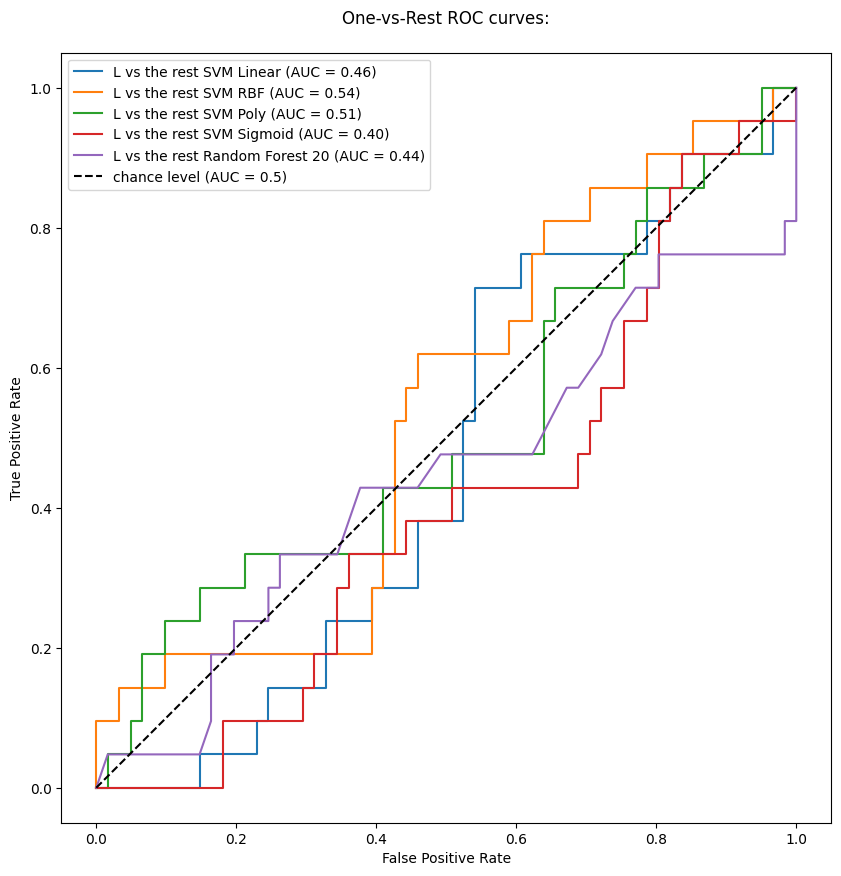

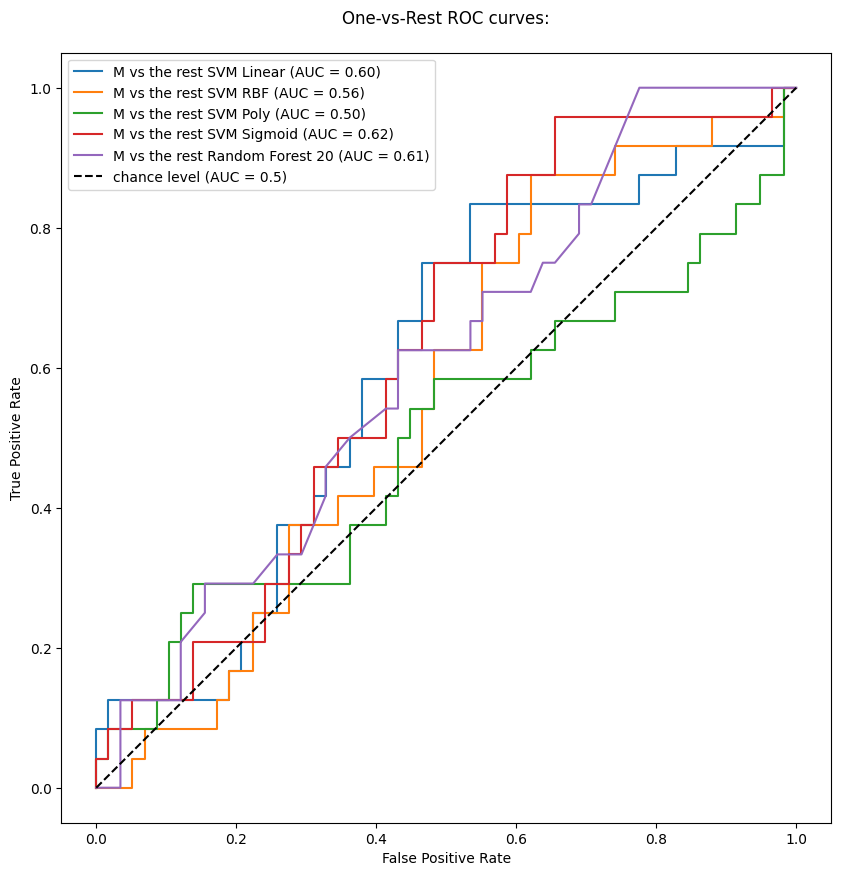

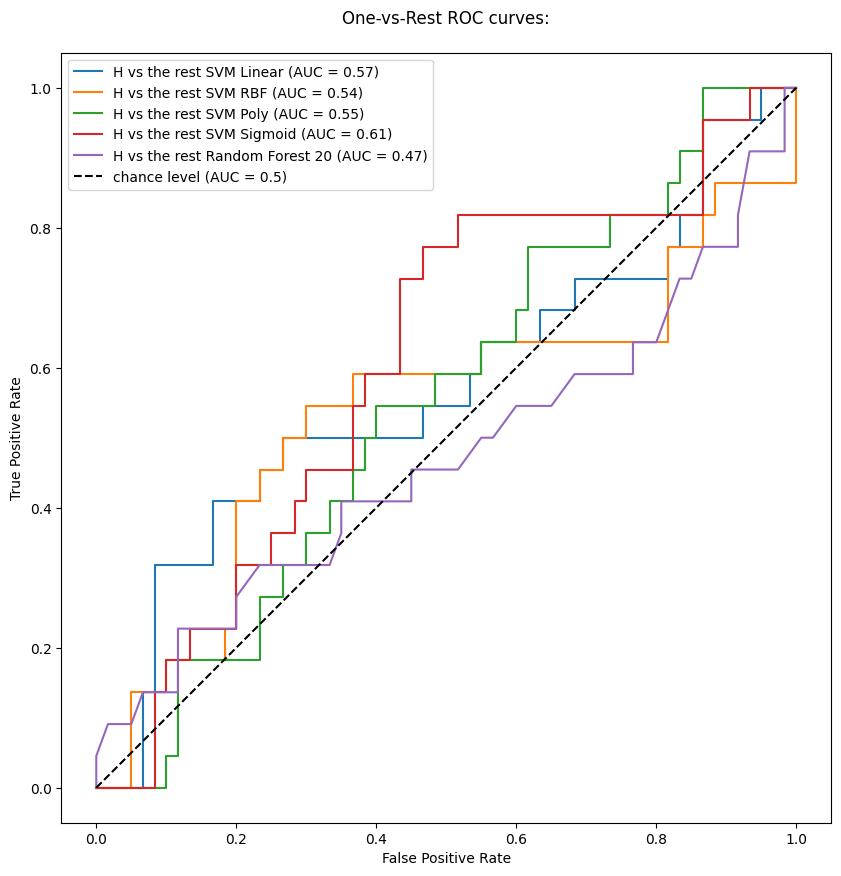

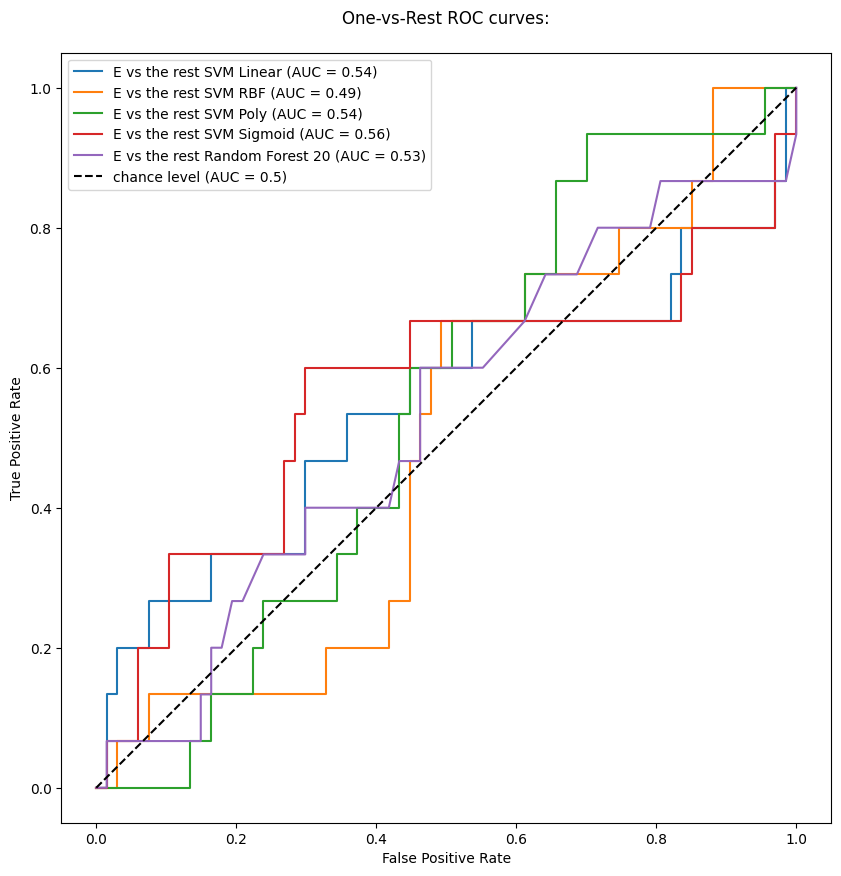

In [40]:
for label in labels:
    plotModelTogether(dfTestFeatures, label)

In [41]:
dfTestScaled.to_csv('test_v2.csv', index=False)